In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import hc_lib.plots.figlib as flib
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
path = '/home/cosinga/scratch/hcolor/output/fiducial_tng100B_099S_0A_800R/results/'
vn_f = pkl.load(open(path + 'vngrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
ssp = 'SubhaloStellarPhotometrics'
f = il.groupcat.loadSubhalos('/home/cosinga/scratch/L75n1820TNG/output/', 99, fields=['SubhaloPos', 'SubhaloMassType', ssp])

In [11]:

for s in vn_f.results['slice']:
    if s.props['space'] == 'real':
        vnreal = s
    else:
        vnred = s


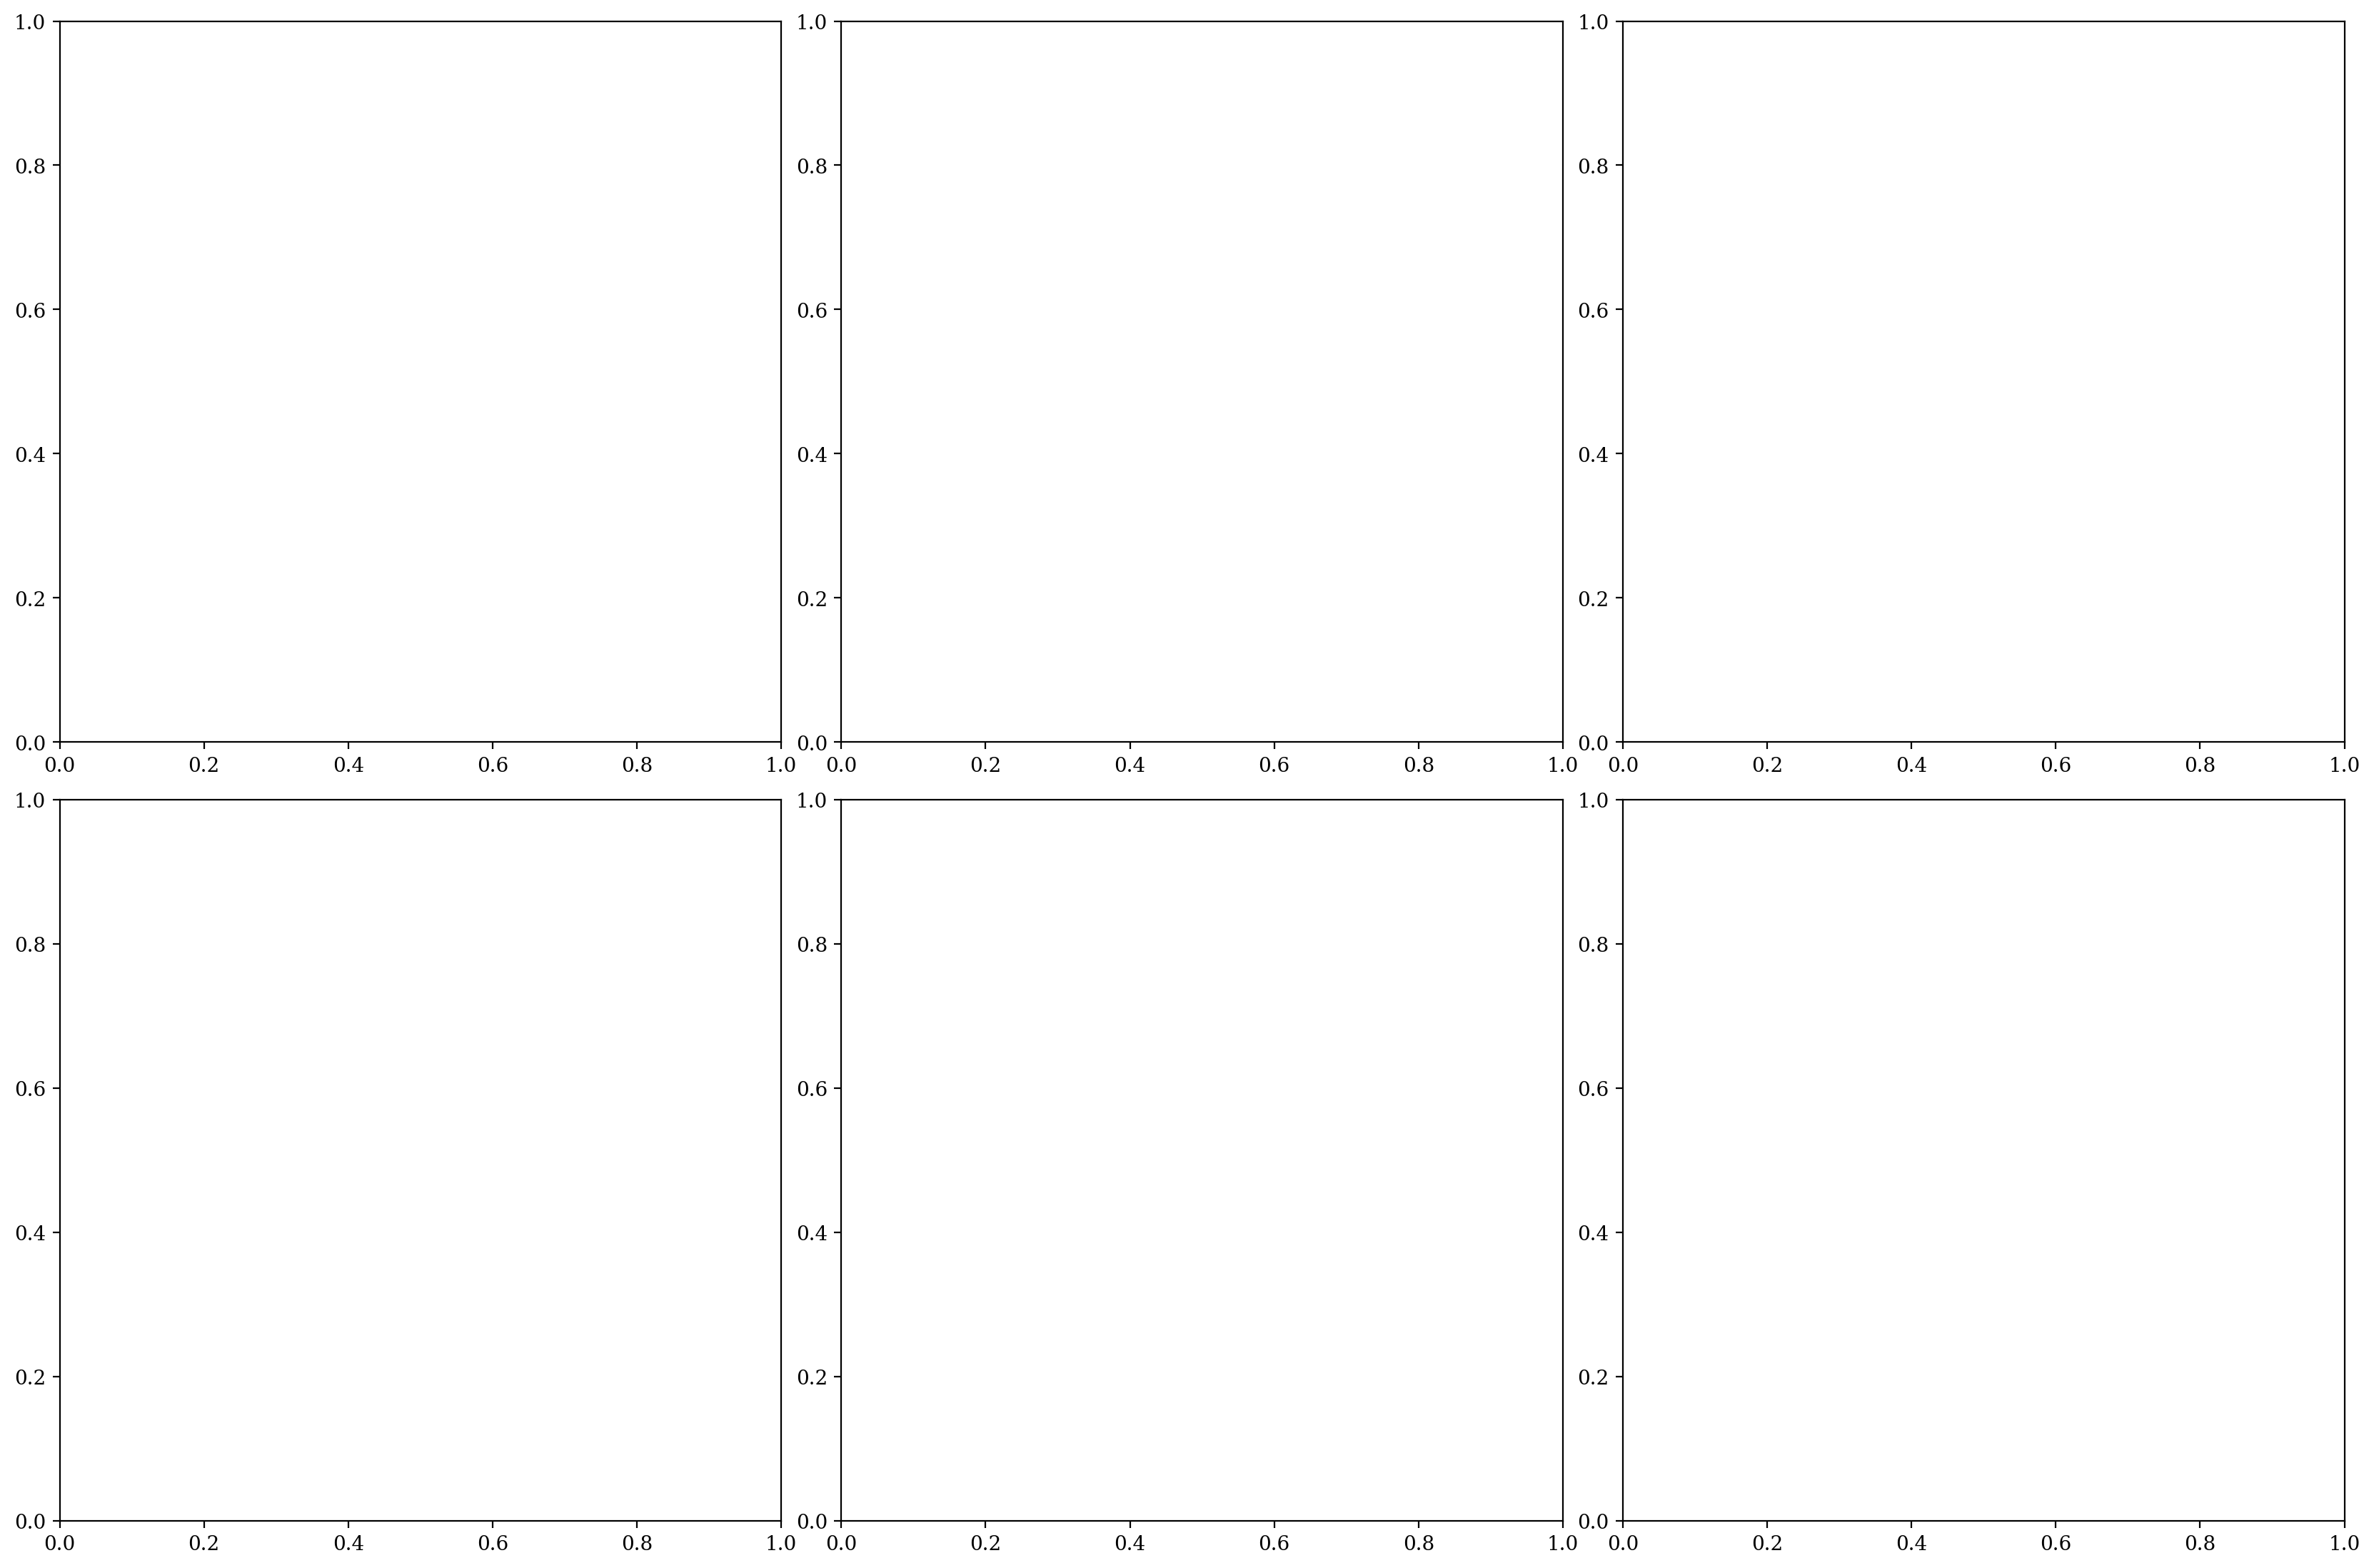

In [12]:
nrows = 2
ncols = 3
xborder = 1
yborder = 1
panel_bt = 0.5
panel_length = 5


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight), dpi = 200)

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

In [13]:
vlim = np.array([10**2, 10**10], dtype = np.float64)
factor = 1/75000**2
vlim *= factor
vlim = np.log10(vlim)
print(vlim)
norm = mpl.colors.Normalize(vmin=vlim[0], vmax=vlim[1])
cmap_name = 'binary'
under = 'white'
cmap = copy.copy(mpl.cm.get_cmap(cmap_name))
cmap.set_under(under)
sm = mpl.cm.ScalarMappable(norm = norm, cmap = cmap)
slices = [vnreal, vnreal, vnred, vnred]
idxs = [(0,0), (0, 1), (1, 0), (1, 1)]
for i in range(len(idxs)):
    rc = slices[i]
    idx = idxs[i]
    xlim, ylim, data = rc.getValues()
    data = data.copy()
    data += np.log10(factor)
    extent=(xlim[0], xlim[1]/2, ylim[0], ylim[1]/2)
            # x_bound, y_bound, mass = pslice.getValues()
            # extent=(x_bound[0], x_bound[1], y_bound[0], y_bound[1])
    mask = data < norm.vmin
    data[mask] = norm.vmin
    dim = data.shape[0]
    panels[idx[0]][idx[1]].imshow(data[dim//2:, :dim//2], cmap = cmap, norm = norm, aspect = 'auto', extent=extent, 
            origin='lower')
fig.colorbar(cax = panels[0][2],mappable = sm)
fig.colorbar(cax = panels[1][2], mappable = sm)

for p in [panels[0][2], panels[1][2]]:
    p.set_aspect(12, anchor = 'W')
    p.tick_params(labelsize = 14)

fig.text(0.75, 0.5, "log($\\Sigma_{\\mathrm{HI}}$ M$_\\odot^{-1}$ cMpc$^{2}$ h$^{-2}$)",
         ha = 'left', va = 'center', fontsize = 20, rotation = 'vertical')

[-7.75012253  0.24987747]


Text(0.75, 0.5, 'log($\\Sigma_{\\mathrm{HI}}$ M$_\\odot^{-1}$ cMpc$^{2}$ h$^{-2}$)')

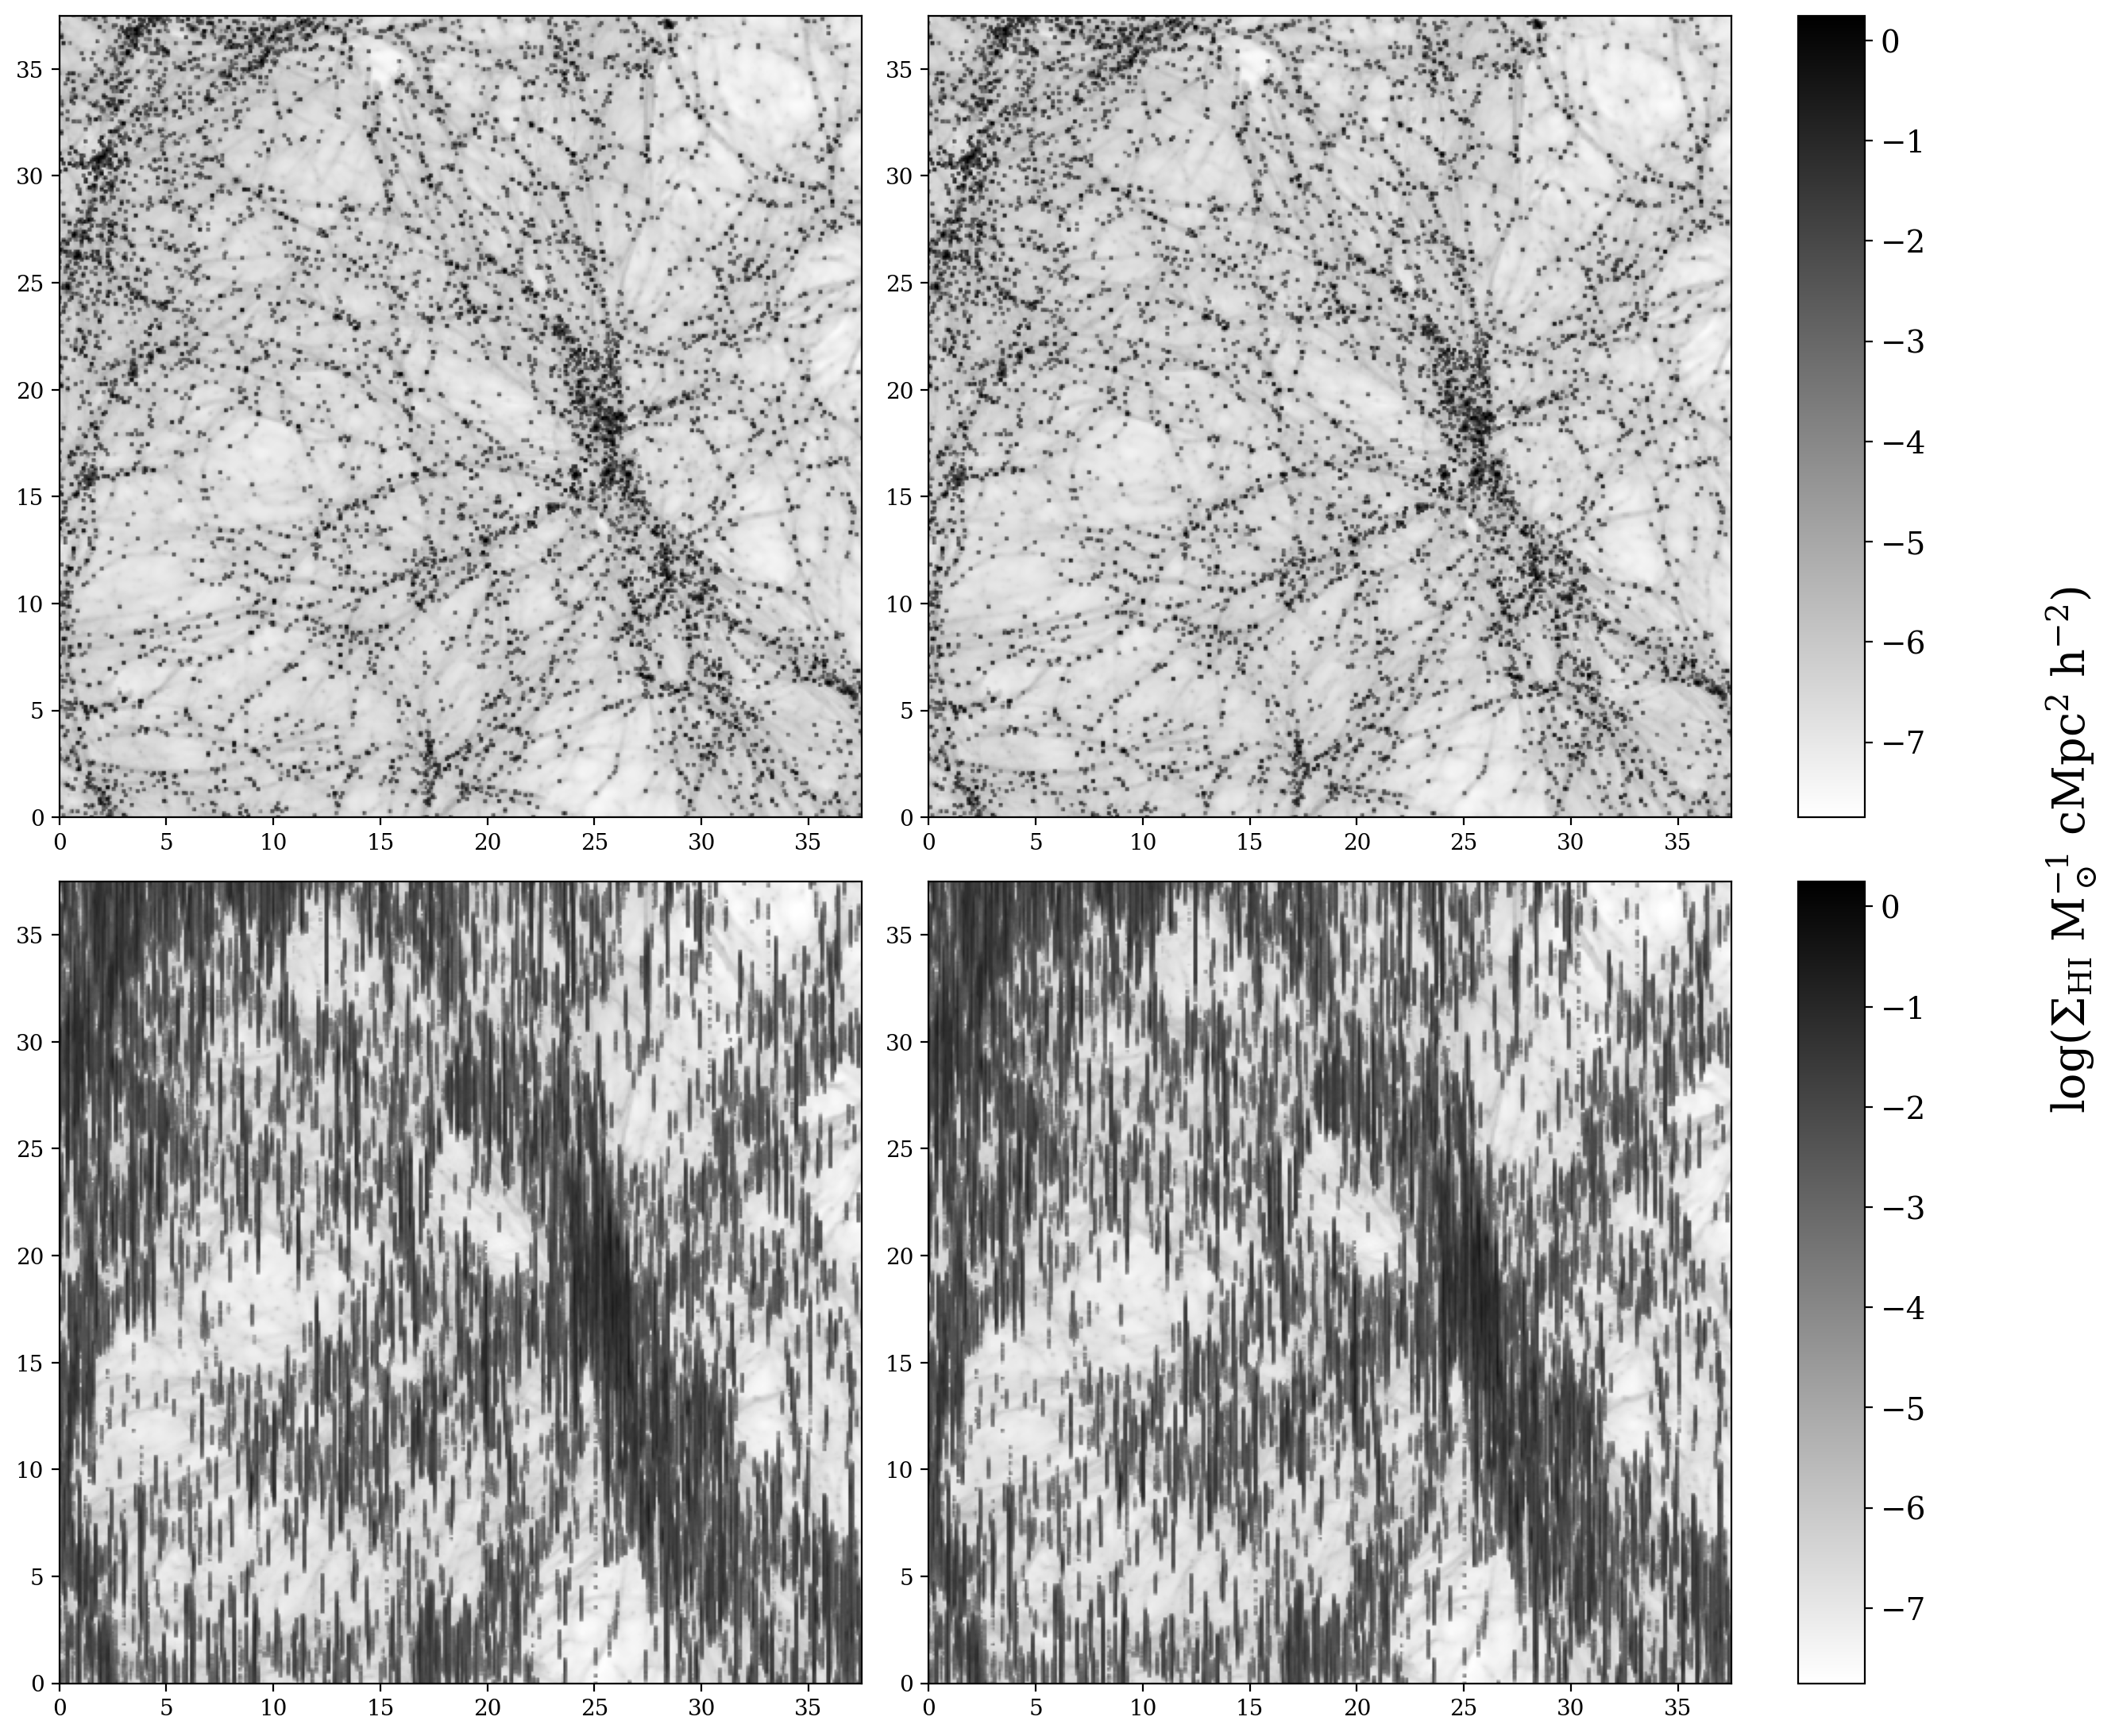

In [14]:
fig

In [15]:
tkw = {'fontsize':20, 'ha':'left', 'va':'bottom'}
locs = [0,5,10,15,20,25,30,35]
clabels = ['Blue Galaxies', 'Red Galaxies']
tkw['ha'] = 'center'
tkw['va'] = 'top'

p = panels[0][0]

lpad = 8
for i in range(nrows):
    for j in range(ncols - 1):
        p = panels[i][j]
        p.tick_params(direction = 'in', labelsize = 14)
        p.set_xticks(locs)
        p.set_yticks([0] + locs)
#         if i == 0:
#             if j == 0:
#                 txtcol = 'blue'
#             else:
#                 txtcol = 'red'
#             p.text(0.5, 0.95, clabels[j], transform = p.transAxes, **tkw)
            p.tick_params(labelbottom = False)
            if j == 0:
                p.set_ylabel('y (cMpc/h)', fontsize = tkw['fontsize'], labelpad = lpad)
        if i == 1:
            if j == 0:
                p.set_ylabel('s (cMpc/h)', fontsize = tkw['fontsize'], labelpad = lpad) 
            if j == 1:
                p.set_xlabel('x (cMpc/h)', fontsize = tkw['fontsize'], labelpad = lpad)
        if not j == 0:
            p.tick_params(labelleft = False)

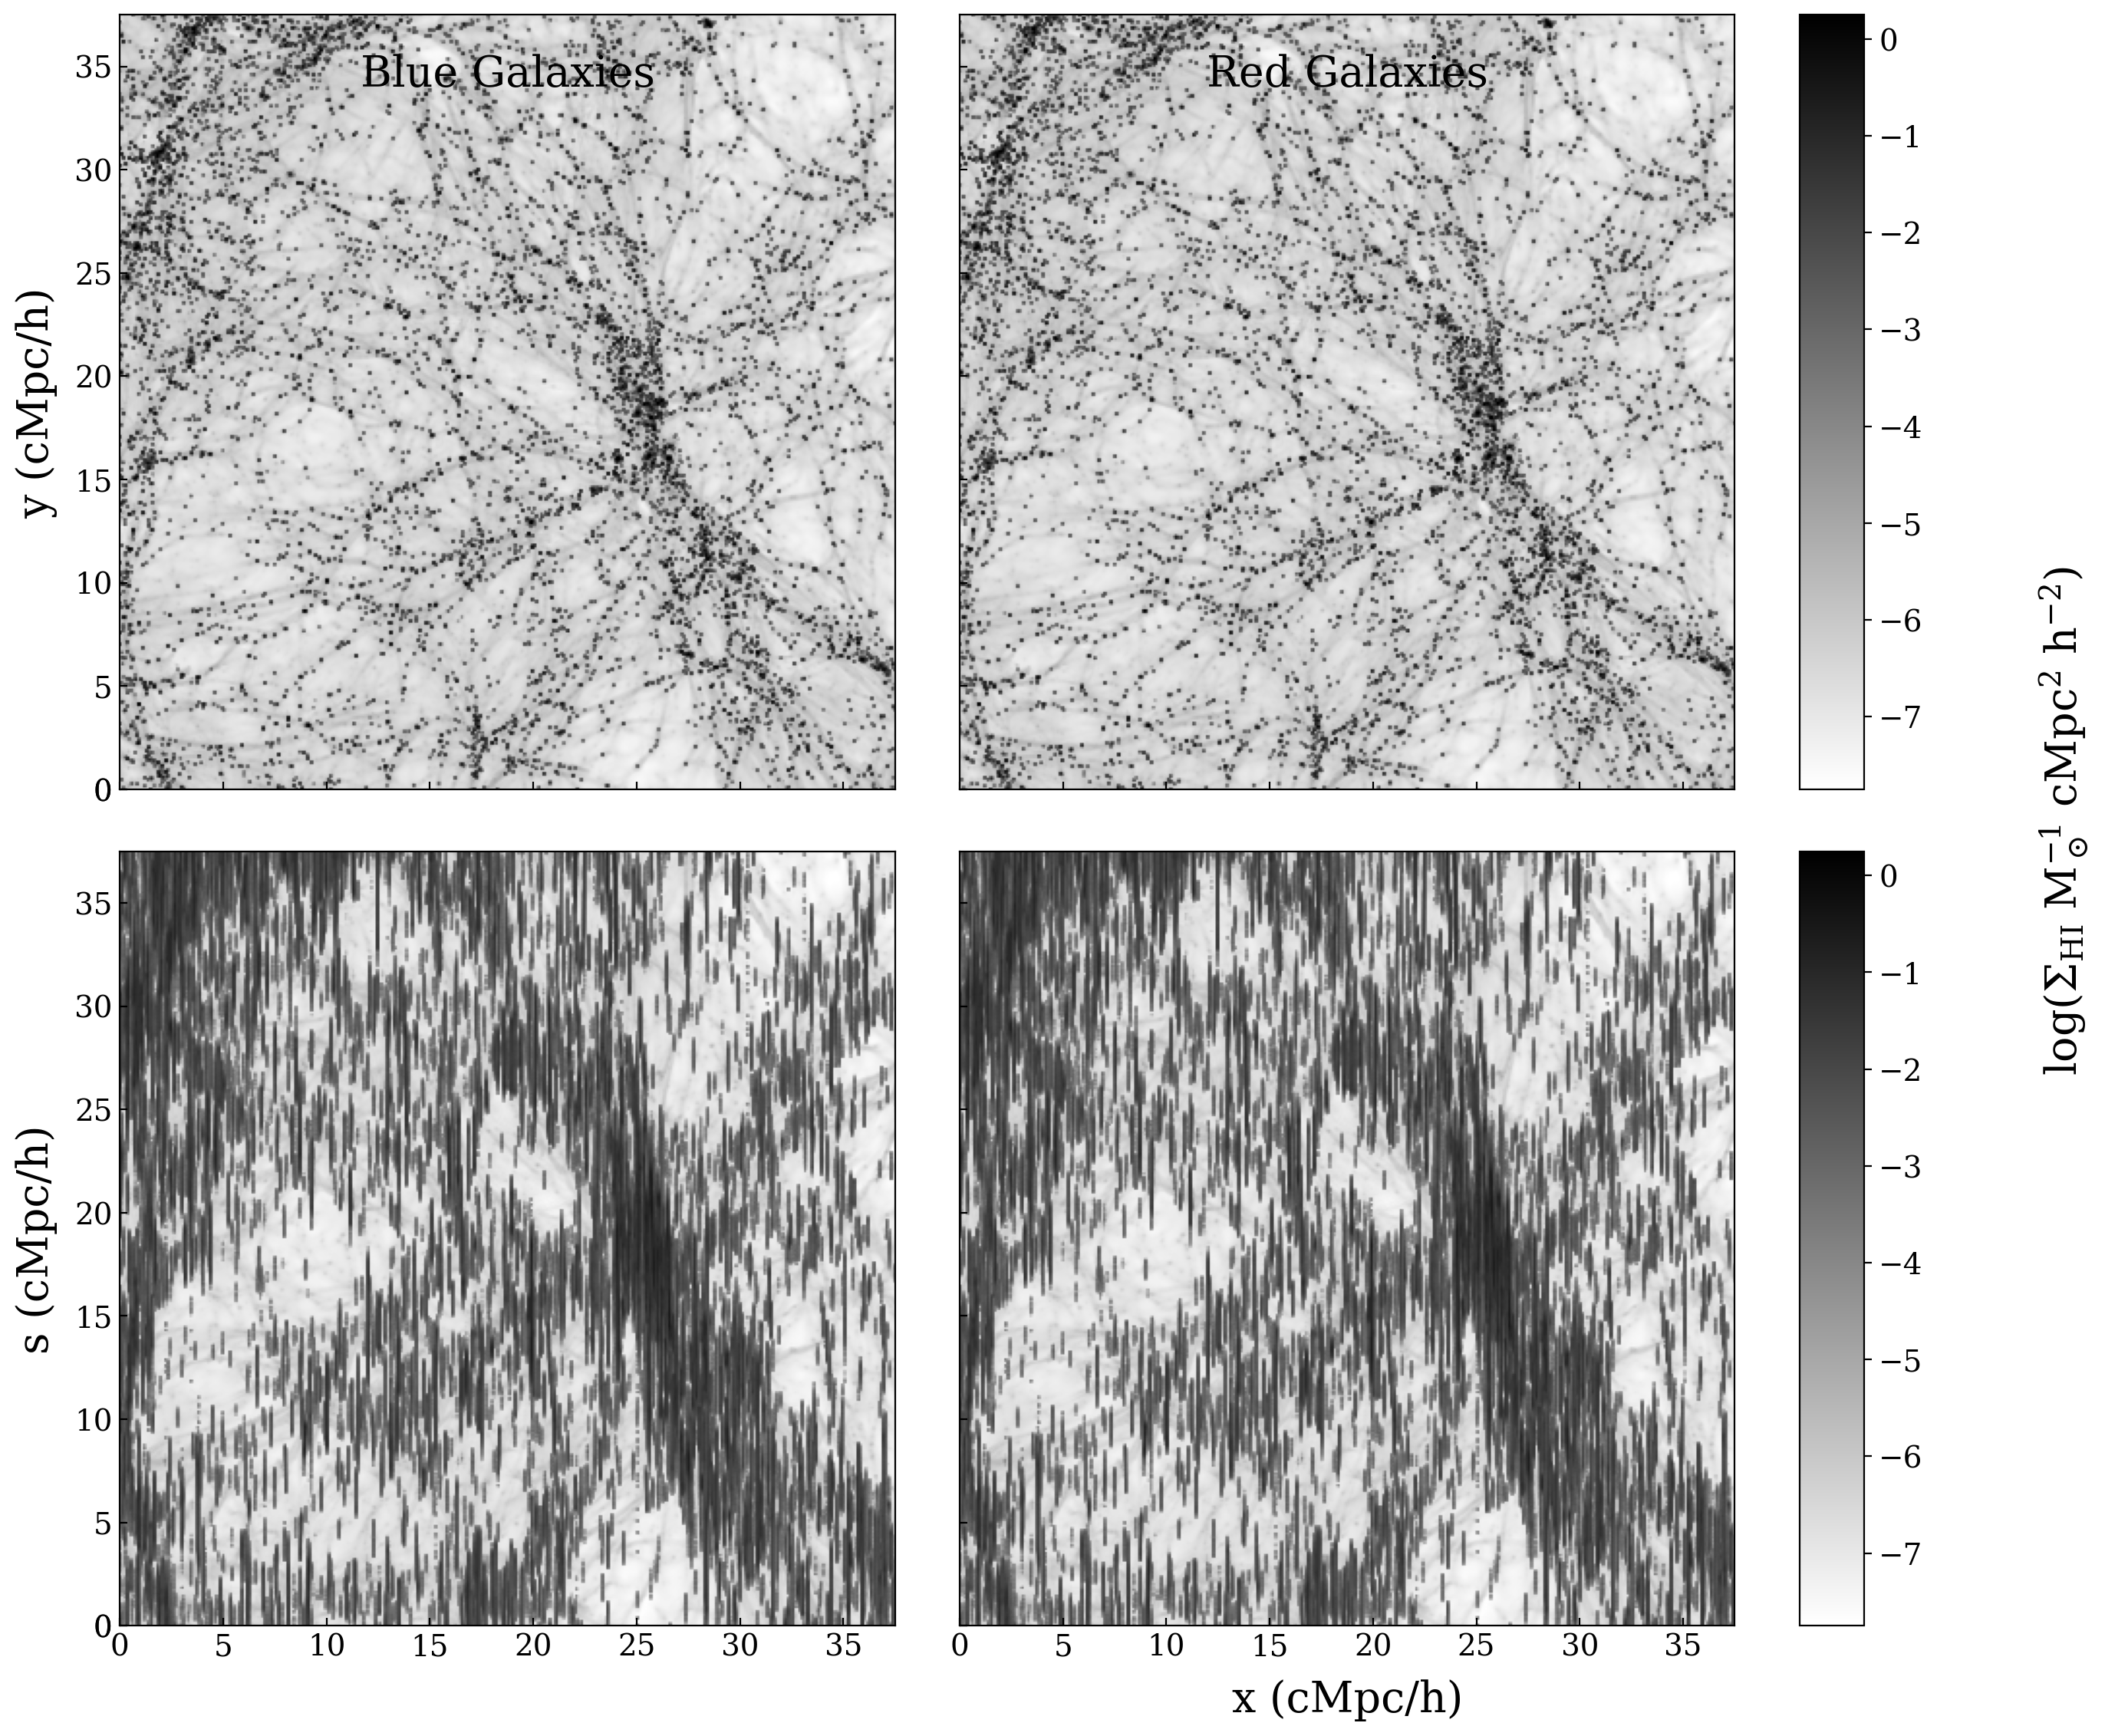

In [16]:
fig

In [ ]:

stmass = f['SubhaloMassType'][:, 4] * 1e10/.6774
resmask = stmass > 2e8
gr = f[ssp][:, 4] - f[ssp][:, 5]
redmask = gr > 0.6
redpos = f['SubhaloPos'][:, :] / 1e3
box = 75
lo = box / 2 - (0.1 * box); hi = 75 / 2 + (0.1 * box)
inslc = (redpos[:, 1] > lo) & (redpos[:, 1] < hi)
tot = resmask & redmask & inslc
lsize = 2
ssize = 1
thresh = 1e12
sizearr = np.zeros(redpos.shape[0])
sizearr[stmass > thresh] = lsize
sizearr[stmass < thresh] = ssize
ax = panels[0][0]
ax.scatter(redpos[tot, 2], redpos[tot, 0], color = 'red', s=sizearr[tot])
